# ASTR 21100 

# "Computational Techniques in Astrophysics"

## Instructor: Andrey Kravtsov

### office: ERC 415; email: kravtsov@uchicago.edu
### office hours: Tue, 10:30am-noon (unless noted otherwise)

#### Teaching Assistants: 
#### Dimitrios Tanoglidis (dtanoglidis@uchicaago.edu)
#### Georgios Zakharegkas (gzakharegkas@uchicago.edu)

### Efficient ways to carry out near neighbor searches

In many applications one needs to find neighbors of a point in some parameter space (or actual regular space, we are used to). The problem were this need arises is estimation of densities, which require defining of a scale $R$ corresponding to say a sphere of such radius and then finding the number of points around a local point that fall within such radius. 

If we have $N$ points, density estimate at each point location via brute-force neighbor search would scale as $\mathcal{O}(N^2)$ and thus is extremely slow for large $N$, as we've already seen in direct $N$-body integration. 

However, efficient ways of finding nearest neighbors exist and you should be aware of at least the most basic of these, so that when you are faced with this problem, you know that the $\mathcal{O}(N^2)$ search can be easily avoided. These efficient methods employ specialized data structures that encode information about spatial locations and structure of the data point distribution.

Perhaps the simplest data structure of this kind is <a href="https://en.wikipedia.org/wiki/Linked_list">linked list</a> - a linear collection of elements, called nodes, which consist of some data and a pointer pointing to the next node in the list. The last node's pointer is either zero in the standard linked list, or points to the first (aka head) node in a <i> circular linked list</i>. Linked list data structure was developed in 1955-1956 by researchers at the RAND corporation and has since then was the main workhorse data structure for lists in computer science and programming. 

Here is an example of a linked list class with functions to construct and manipulate it adopted from <a href="https://www.codefellows.org/blog/implementing-a-singly-linked-list-in-python/">codefellows</a>. 

In [1]:
class Node(object):

    def __init__(self, data=None, next_node=None):
        self.data = data
        self.next_node = next_node

    def get_data(self):
        return self.data

    def get_next(self):
        return self.next_node

    def set_next(self, new_next):
        self.next_node = new_next


class LinkedList(object):
    """
    class for manipulating the nodes in the linked list
    
    """

    def __init__(self, head=None):
        self.head = head

    def insert(self, data):
        new_node = Node(data)
        new_node.set_next(self.head)
        self.head = new_node
         
    def size(self):
        current = self.head
        count = 0
        while current:
            count += 1
            current = current.get_next()
        return count

    def search(self, data):
        current = self.head
        found = False
        while current and found is False:
            if current.get_data() == data:
                found = True
            else:
                current = current.get_next()
        if current is None:
            print("%s is not in the list"%data)
            return None
        return current

    def delete(self, data):
        current = self.head
        previous = None
        found = False
        while current and found is False:
            if current.get_data() == data:
                found = True
            else:
                previous = current
                current = current.get_next()
        if current is None:
            print("%s is not in the list"%data)
            return None
        if previous is None:
            self.head = current.get_next()
        else:
            previous.set_next(current.get_next())

Here are some examples of how a linked list can be constructed and manipulated. 

In [2]:
import numpy as np

classlist = ['Yuxi', 'Nora', 'Dimitrios', 'Rebecca', 'Georgios', 'Jisheng']

class_list = LinkedList()

def print_class_list(class_list):
    next_node = class_list.head
    while next_node != None:
        print("%s"%next_node.get_data()) 
        next_node = next_node.get_next()
    print('-------')
    
for name in classlist:
    class_list.insert(name)

print_class_list(class_list)
class_list.insert('Andrey')
print_class_list(class_list)
class_list.delete('Andrey')
print_class_list(class_list)

print("data for Rebecca: %s"%(class_list.search('Rebecca').get_data()))
class_list.search('Albert')

Jisheng
Georgios
Rebecca
Dimitrios
Nora
Yuxi
-------
Andrey
Jisheng
Georgios
Rebecca
Dimitrios
Nora
Yuxi
-------
Jisheng
Georgios
Rebecca
Dimitrios
Nora
Yuxi
-------
data for Rebecca: Rebecca
Albert is not in the list


The definition of a linked list via class is good for general linked lists. However, it also obfuscates the simplicity of linked lists, which can be constructed very simply and cheaply for specific purposes.

For example, if we just need to construct linked lists for set of $N$ points, we just need an array of size $N$. Let's say we have a collection of $N$ points with $x_i$ values from 0 to 10 ($i\in[1,N]$), but the values are random and are not correlated with the point index $i$, and we want to easily find all points with $x\in[0,1)$, $x\in [1,2)$, etc. We can achieve this by constructing 10 linked lists using single array of size $N$, as shown in the code below. 

In [4]:
N  = 100 # number of points
x  = np.random.uniform(high = 10., size=N)
ll = np.zeros(np.shape(x), dtype=int)
lh = np.zeros(10, dtype=int)

# construct linked lists
for i, xd in enumerate(x):
    ich = int(xd) # list number to which x belongs
    lcurr = lh[ich] # head point in the list
    if lcurr: # if the list is not empty
        lnext = ll[lcurr] # get next point in the list 
        while lnext: # while next point exists 
            lcurr = lnext      # walk down the list
            lnext = ll[lcurr]
        ll[lcurr] = i # when lnext=0, insert i as the last entry in the list
    else: # if list is still empty
        lh[ich] = i; ll[i] = 0 # insert the current point as its head
        
# now we can easily look at points with, say, 4 < x < 5 
# -> i.e., we find points within)
lcurr = lh[4]; lnext = ll[lcurr]
while lnext:
    print(lnext, x[lnext])
    lnext = ll[lnext]


14 4.868376465100422
15 4.193175134882519
27 4.502007728072269
32 4.423568439749088
42 4.61058298299315
45 4.114409979987523
47 4.417233952129211
69 4.361769211074628


This simple 1-d example illustrates how linked lists help with neighbor searches. If I want to find all points within $4.5\pm 1$, I will need to examine also chunks 3 and 5 and computed distances for the points in those chunks to 4.5 and extract points which fall within specified distance. 

Analogously to splitting into 1-d chunks in the code above, if we want to find neighbors in 3D space within a certain distance $R$ from any point among $N$ points. If we split the volume of interest into $N_c$ cubes of size $2R$. Consider two arrays: <tt>lh</tt> of size $N_c$ and <tt>ll</tt> of size $N$. If we go through all the points 
and assign each entry in <tt>lh</tt> corresponding to a given cube the pointer to the first particle that's located in the cube, then assign pointer to the next particle located in the same value to the <tt>ll</tt> entry for that particle or 0 if there are no particles in the cube. This constructs a linked list of particles located in a given cube. 

If we do this for all cubes, we will have the ability to find all particles located in any cube, by going to its <tt>lh</tt> array entry to get the head particle in its linked list, and then following the sequence of pointers in <tt>ll</tt> until we hit 0 to get all the particles in the cube. 

Then to find neighbors around a given point we just need to find all the nearby cubes that could contain particles within $R$ and then scan all linked lists of these cubes and examine distances of the particles in the linked lists to the current particle selecting all those with distance $\leq R$. 

Thus, having constructed linked lists of particles in all cubes in $\mathcal{O}(N)$ operations, we can then use the linked lists to search for neighbors for each particle in the set in $\mathcal{O}(N_l)$ operations, where $N_l$ is the number of particles in the linked lists of neighboring cells. This number will depend on the distribution of points. For uniform distribution, $N_l\approx N/N_c$. In such case, we would have reduced the complexity of neighbor searching from $\mathcal{O}(N^2)$ to $\mathcal{O}(N[1+1/N_c)]$, i.e. to $\approx \mathcal{O}(N)$ for large $N_c$! 
Not bad for a bit of coding! This is an illustration how a clever data structure, like linked list can simplify algorithmic complexity of a problem. 

Construction of the linked lists is simple, but their use for neighbor searchers requires specifying tesselation (i.e., partitioning) of space into cells. If cells are equal volume cubes and are covering the entire spatial region of interest uniformly, the number of cells will scale with the number of spatial dimensions $D$, while most cells will be empty for non-uniform particle distributions. This is inefficient in terms of memory and memory requirement will become prohibitive for large $D$. 

For such cases, tree data structures are used to find neibors efficiently. Trees can be used to support tesselation of space that adhers to the point distribution and thus eliminates or elmost eliminates empty cells.  

The trees are data structures allowing hierarchical organization of data. They consist of a number of parent and child nodes and links between them that support the tree data structure and make it traversable and searchable. There is a large variety of tree data structures and the way that they are implemented. 
The trees that are commonly encountered are binary, quad, oct, etc. tree. Such trees start with a root node and root node is split according to a specified rule, into 2 (binary tree), 4 (quad tree), 8 (oct tree), etc. child nodes. Binary, quad, and oct trees are natural choices for tesselation of 1-d, 2-d, and 3-d space, where all nodes are equal-size segments, squares, or cubes. However, the number of cells with each subsequent tree level grows exponentially as $2^l$, $4^l$, $8^l$ for the binary, quad, and oct tree, respectively. If we would continue this strategy for tesselating space into larger number of dimensions, each level would require creation of $2^{dl}$ cells. So for $d=10$, to go to level 2, requires $2^{20}\approx 10^6$ cells. This is one of the manifestations of what's known as <i>the curse of dimensionality</i>. 

Thus, in practice for work in $D>3$ spaces, binary trees are preferred to minimize the rate of growth of the number of cells with increasing level of the tree. Even in this case, the curse is minimized, not eliminated. 

Here we will consider specific instances of <i>binary trees</i> - the k-d tree and ball tree. 

#### <a href="https://en.wikipedia.org/wiki/K-d_tree">$k$-d tree:</a> 

short for "$k$-dimensional tree" is a useful binary tree data structure for nearest neighbor searches introduced in 1975 by Jon Louis Bentley along with a heuristic algorithm for its construction, an american computer scientist who later became also well known for his "Programming pearls" books. 

There are different ways to construct a $k$-d tree. In the simplest and most illustrative method, one starts with a root node representing the entire domain of interest and encloses all data points in the $k$-dimensional space. Then 2 child nodes are defined as sub-volumes of the root that are split by the hyperplane in the first dimension, with the position of the hyperplane corresponding to the median of the point distribution, or coordinate close to it. 
Each of the two child nodes is then split into further two child nodes along the next dimension, using the points corresponding to median coordinate of points in each child node along that dimension etc. The process continues until there are no more points to be used for splitting nodes or if a given specified level of refinement is reached. 

The tree construction can be achieved in $\mathcal{O}(N\log N)$ operations.
This is because finding a split along first dimensions requires scanning through all points, i.e. $\mathcal{O}(N)$ operations. Then on the next level, this will have to be done twice for $N/2$ particles, so again $\mathcal{O}(N)$ and so on, so that for the tree level $l$, the number of operations is $\mathcal{O}(lN)$. 
If we want to construct a tree with nodes that contain a single or a few particles the level of the required tree will be $l=\mathcal{O}(\log_2 N)$ (i.e. to for 2 points clearly $l=1$ always, for 4 points, $l=2$, etc). Thus, the total number of operations required for the binary tree construction is $\mathcal{O}(N\log_2 N)$. This is quite efficient, especially if we note that tree needs to be constructed only once and it can then be used to find neighbors for all points. 

Code example below is from the AstroML library and shows an example implementation of $k$-d tree class and shows how a $k$-d tree is constructed for a 2-d distribution of points. The implementation here uses recursion to make the tree construction easy to code up and transparent. Perhaps an even simpler implementation is shown on the <a href="https://en.wikipedia.org/wiki/K-d_tree">$k$-d tree wikipedia page.</a>

In astrophysics entire codes, such as N-body code <a href="http://www-hpcc.astro.washington.edu/faculty/trq/brandon/pkdgrav.html"><tt>PKDGRAV</tt></a>, are built based on the k-d tree concept. 

time to construct example KDTree = 0.000997304916381836
time to construct scipy.spatial.cKDTree = 0.001994609832763672


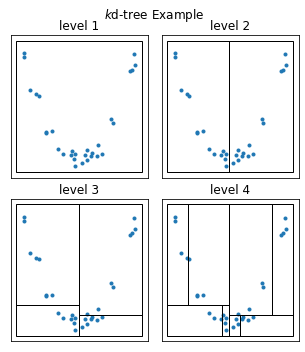

In [7]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from scipy.spatial import cKDTree
from time import time

# We'll create a KDTree class which will recursively subdivide the
# space into rectangular regions.  Note that this is just an example
# and shouldn't be used for real computation; instead use the optimized
# code in scipy.spatial.cKDTree or sklearn.neighbors.BallTree
class KDTree:
    """Simple KD tree class"""

    # class initialization function
    def __init__(self, data, mins, maxs):
        self.data = np.asarray(data)

        # data should be two-dimensional
        assert self.data.shape[1] == 2

        if mins is None:
            mins = data.min(0)
        if maxs is None:
            maxs = data.max(0)

        self.mins = np.asarray(mins)
        self.maxs = np.asarray(maxs)
        self.sizes = self.maxs - self.mins

        self.child1 = None
        self.child2 = None

        if len(data) > 1:
            # sort on the dimension with the largest spread
            largest_dim = np.argmax(self.sizes)
            i_sort = np.argsort(self.data[:, largest_dim])
            self.data[:] = self.data[i_sort, :]

            # find split point
            N = self.data.shape[0]
            N2 = int(N/2)
            N21 = int(N/2 - 1)
            split_point = 0.5 * (self.data[N2, largest_dim]
                                 + self.data[N21, largest_dim])

            # create subnodes
            mins1 = self.mins.copy()
            mins1[largest_dim] = split_point
            maxs2 = self.maxs.copy()
            maxs2[largest_dim] = split_point

            # Recursively build a KD-tree on each sub-node
            self.child1 = KDTree(self.data[N2:], mins1, self.maxs)
            self.child2 = KDTree(self.data[:N2], self.mins, maxs2)

    def draw_rectangle(self, ax, depth=None):
        """Recursively plot a visualization of the KD tree region"""
        if depth == 0:
            rect = plt.Rectangle(self.mins, *self.sizes, ec='k', fc='none')
            ax.add_patch(rect)

        if self.child1 is not None:
            if depth is None:
                self.child1.draw_rectangle(ax)
                self.child2.draw_rectangle(ax)
            elif depth > 0:
                self.child1.draw_rectangle(ax, depth - 1)
                self.child2.draw_rectangle(ax, depth - 1)


#------------------------------------------------------------
# Create a set of structured random points in two dimensions
np.random.seed(0)

X = np.random.random((30, 2)) * 2 - 1
X[:, 1] *= 0.1
X[:, 1] += X[:, 0] ** 2

#------------------------------------------------------------
# Use our KD Tree class to recursively divide the space
t1 = time()
KDT = KDTree(X, [-1.1, -0.1], [1.1, 1.1])
t2 = time()
print("time to construct example KDTree =",t2-t1)

t1 = time()
ckdt = cKDTree(X)
t2 = time()
print("time to construct scipy.spatial.cKDTree =",t2-t1)

#------------------------------------------------------------
# Plot four different levels of the KD tree
fig = plt.figure(figsize=(5, 5))
fig.subplots_adjust(wspace=0.1, hspace=0.15,
                    left=0.1, right=0.9,
                    bottom=0.05, top=0.9)

for level in [1,2,3,4]:
    lev = level
    if lev > 4 : lev = 4
    ax = fig.add_subplot(2, 2, lev, xticks=[], yticks=[])
    ax.scatter(X[:, 0], X[:, 1], s=9)
    KDT.draw_rectangle(ax, depth=level - 1)

    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-0.15, 1.15)
    ax.set_title('level %i' % level)

# suptitle() adds a title to the entire figure
fig.suptitle('$k$d-tree Example')
plt.show()

As you can see from the above 2-d example, $k$-d tree produces cells that tend to be elongated along direction that undergoes splitting later. If $d=10$, for example, by the time we will split along the 10th dimension for the first time, $2^{10}\approx 10^3$ nodes will already have been created. This means that splitting along later dimensions will not be efficient.

This can be rectified by choosing the dimension on which to split, not in the order of dimensions, but by some measure such as the dimension along which the extent of points is largest. This, however, brings up a problem of dimensionality if our space is not metric (i.e., different dimensions have different units): how to we compare extents along different dimensions meaningfully? 

The problem of measuring distances in non-metric spaces, however, is a general problem of neighbor searches because distance needs to be defined to define what a neighbor is. Solution of this problem depends on specific case. Here I would just note that definions of distance that side-step the fact that space is non-metric do exist (e.g., <a href="https://papers.nips.cc/paper/1581-classification-in-non-metric-spaces.pdf">Weinshall et al.</a>). Also note that in the $k$-d tree one can compute local density by taking the number of particles in a tree cell and dividing by cell volume. This density estimate requires no distance estimates, but does estimate local density (see <a href="http://adsabs.harvard.edu/abs/2005MNRAS.356..872A">Ascasibar & Binney 2005</a> for details).

Another type of tree - the <i>ball tree</i> - rectifies the assymetry of the cells in the $k$-d tree, which may increase efficiency of neighbor searches for many point distributions. 


Neighbor searches can be done using $k$-d tree efficiently, because we can walk the tree in $O(N\log_2 N)$ steps. Starting with a root node we can examine the child nodes and select only those nodes whose extent falls within the range of distance within which we are searching for neighbors (you can see detailed algorithm <a href="https://en.wikipedia.org/wiki/K-d_tree#Nearest_neighbour_search">here</a>). 

#### Another type of tree: <a href="https://en.wikipedia.org/wiki/Ball_tree">ball tree</a>

A ball-tree is a binary tree, in which every node defines a d-dimensional hypersphere, or "ball", containing a subset of the points for which the tree is constructed. Each internal node of the tree partitions the data points into two disjoint sets which are associated with different balls. 
While the balls themselves may intersect, each point is assigned to one or the other ball in the partition according to its distance from the ball's center. Each leaf node in the tree defines a ball and enumerates all data points inside that ball.

As with k-d trees there are many different possible algorithms for construction of ball tree. One of the simplest ways is similar to the k-d tree construction: the tree is constructed recursively starting with a sphere that encloses all points. The points are then split into two subsets along the successive dimensions, with partition coordinate defined by the median value of all points along that dimension or a position close to the median. Two balls are then defined with the centers given by the mean position of points in the subsets and the radius that corresponds to the distance from the centroid to the most distant point in the subset.  

As for the $k$-d tree, ball tree construction for $N$ points requires $\mathcal{O}(N\log_2 N)$ operations. Below is an example code constructing ball tree recursively from the AstroML package in 2-d for the same point distribution as above, which illustrates its properties and differences from the $k$-d tree nicely. 

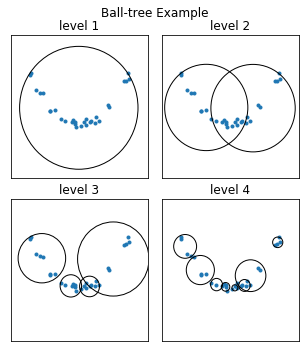

In [10]:
from matplotlib.patches import Circle

# We'll create a BallTree class which will recursively subdivide the
# space into circular regions.  Note that this is just an example and
# shouldn't be used for real computation; instead use the optimized
# code in scipy.spatial.cKDTree or sklearn.neighbors.BallTree
class BallTree:
    """Simple Ball tree class"""

    # class initialization function
    def __init__(self, data):
        self.data = np.asarray(data)

        # data should be two-dimensional
        assert self.data.shape[1] == 2

        self.loc = data.mean(0)
        self.radius = np.sqrt(np.max(np.sum((self.data - self.loc) ** 2, 1)))

        self.child1 = None
        self.child2 = None

        if len(self.data) > 1:
            # sort on the dimension with the largest spread
            largest_dim = np.argmax(self.data.max(0) - self.data.min(0))
            i_sort = np.argsort(self.data[:, largest_dim])
            self.data[:] = self.data[i_sort, :]

            # find split point
            N = self.data.shape[0]
            N2 = int(N/2)
            N21 = int(N/2 - 1)
            split_point = 0.5 * (self.data[N2, largest_dim]
                                 + self.data[N21, largest_dim])

            # recursively create subnodes
            self.child1 = BallTree(self.data[N2:])
            self.child2 = BallTree(self.data[:N2])

    def draw_circle(self, ax, depth=None):
        """Recursively plot a visualization of the Ball tree region"""
        if depth is None or depth == 0:
            circ = Circle(self.loc, self.radius, ec='k', fc='none')
            ax.add_patch(circ)

        if self.child1 is not None:
            if depth is None:
                self.child1.draw_circle(ax)
                self.child2.draw_circle(ax)
            elif depth > 0:
                self.child1.draw_circle(ax, depth - 1)
                self.child2.draw_circle(ax, depth - 1)


#------------------------------------------------------------
# Create a set of structured random points in two dimensions
np.random.seed(0)
X = np.random.random((30, 2)) * 2 - 1
X[:, 1] *= 0.1
X[:, 1] += X[:, 0] ** 2

#------------------------------------------------------------
# Use our Ball Tree class to recursively divide the space
BT = BallTree(X)

#------------------------------------------------------------
# Plot four different levels of the Ball tree
fig = plt.figure(figsize=(5, 5))
fig.subplots_adjust(wspace=0.1, hspace=0.15,
                    left=0.1, right=0.9,
                    bottom=0.05, top=0.9)

for level in range(1, 5):
    ax = fig.add_subplot(2, 2, level, xticks=[], yticks=[])
    ax.scatter(X[:, 0], X[:, 1], s=9)
    BT.draw_circle(ax, depth=level - 1)

    ax.set_xlim(-1.35, 1.35)
    ax.set_ylim(-1.0, 1.7)
    ax.set_title('level %i' % level)

# suptitle() adds a title to the entire figure
fig.suptitle('Ball-tree Example')
plt.show()

#### Computational efficiency of linked lists and trees

In practical applications involving large number of points and dimensions, one has to be concerned with computational efficiency of the particular data structure implementation. Small changes in the implementation may result in significantly different performance. 

Check out exploration of efficiency of different list implementations for range queries (another fancy term for neighbor searches that one often encounters) by Phil Mansfield in his blog <a href="https://floatingpointastronomy.wordpress.com/2016/10/06/high-performance-lists-i-lists-and-you/">here</a>, <a href="https://floatingpointastronomy.wordpress.com/2016/10/10/high-performance-lists-ii-naive-linked-lists/">here</a>, and <a href="https://floatingpointastronomy.wordpress.com/2016/10/20/high-performance-lists-iii-array-lists/">here</a>.

In this <a href="https://jakevdp.github.io/blog/2013/04/29/benchmarking-nearest-neighbor-searches-in-python/">blog post</a> Jake van der Plas compares performance of different implementations of $k$-d and ball trees in scipy and scikit-learn. The differences in some regimes are substantial and one needs to consult these benchmarks to decide which implementation is best for the job, if the job is very computationally intensive. 

Here we will concern ourselves with the primary application of tree structures for neighbor searches and density estimates. The first example is estimate of density of MCMC samples of the posterior distribution to estimate the Bayes factor (see notes). The second example concerns searches for pairs of halos in a halo catalog separated by a specified separation, $R$. 

#### Example of how k-D tree can be used to estimate density

In this particular example the density estimate in multi-d parameter space from the MCMC samples of the posterior distribution is used to estimate Bayes factors of a model for model comparison in a Bayesian analysis. How the Bayes factors are used in Bayesian model selection is well-illustrated and contrasted with the frequentist approach in this <a href="https://jakevdp.github.io/blog/2015/08/07/frequentism-and-bayesianism-5-model-selection/">blog post</a> by Jake van der Plas (look towards the end). There he has simply computed evidence integrals needed for estimate of the Bayes factor via standard integration techniques because problems he considered were 2- and 3-d. However, in multiple dimensions such integration is not feasible, while Monte Carlo integration converges too slowly. 

Ivezic et al. in their book "Statistics, Data Mining, and Machine Learning in Astronomy" introduced a neat trick (S 5.8.4), which allows one to estimate the evidence integral by using a density estimate of MCMC samples near the peak of the posterior distribution. This is because computing the evidence for a model $M$ involves integrating over unnormalized posterior distribution $\pi(\vec{\theta}\vert \vec{d}, I)$:
$$ E(M) = \int \pi(\vec{\theta}\vert \vec{d}, I) d^k\vec{\theta}.$$
By the nature of the MCMC algorithm, the density of MCMC samples in a converged chain at a given location should be proportional to $\pi(\vec{\theta}\vert \vec{d}, I)$ at that location:
$$\rho(\vec{\theta})=C N\pi(\vec{\theta}), $$
where $C$ is an unknown constant of proportionality and $N$ is the total number of MCMC samples in the chain. If we integrate this equation over the entire parameter space we get: 
$$\int \rho(\vec{\theta})d^k\vec{\theta}=N= CN \int \pi(\vec{\theta})d^k\vec{\theta}= CN E(M).$$
Thus, $E(M)=1/C$ and we can estimate at any point $\vec{\theta}$ in the parameter space the evidence as: 
$$E(M)\approx N\frac{\pi(\vec{\theta})}{\rho(\vec{\theta})}.$$

Of course, it makes sense to do this at a point where density of the points is highest - i.e., near the peak of the posterior. 
This is the best we can do, because in that region the estimate of density will be the most accurate. Note, however, that measurement of density in the non-metric space rears its head again. If models with very different parameters and parameter units are compared, this estimate may not make much sense. For dimensionless parameters (such as say $\Omega_{\rm m}$ or any logged variable), however, this will work well. 

The routine from AstroML package below shows how scikit-learn's BallTree routine is used to estimate density of the MCMC samples near the peak of the posterior. 

In [11]:
# clever estimate of the Bayes factor from the AstroML library
# http://www.astroml.org/book_figures/chapter5/fig_model_comparison_mcmc.html#book-fig-chapter5-fig-model-comparison-mcmc
from sklearn.neighbors import BallTree
from scipy.special import gamma

def estimate_bayes_factor(traces, logp, r=0.05, return_list=False):
    """Estimate the bayes factor using the local density of points"""
    N, D = traces.shape
    
    # compute volume of a D-dimensional sphere of radius r
    Vr = np.pi**(0.5*D) / gamma(0.5*D + 1) * (r**D)

    # use neighbor count within r as a density estimator
    bt = BallTree(traces)
    count = bt.query_radius(traces, r=r, count_only=True)
    BF = logp + np.log(N) + np.log(Vr) - np.log(count)

    if return_list:
        return BF
    else:
        p25, p50, p75 = np.percentile(BF, [25, 50, 75])
        return p50, 0.7413 * (p75 - p25)
